In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as p1t
import seaborn as sns

In [3]:
df = pd.read_csv('spotifyHistory.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'spotifyHistory.csv'

In [5]:
df = pd.read_csv('spotify_history.csv')

In [7]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,7/8/13 2:44,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,7/8/13 2:45,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,7/8/13 2:50,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,7/8/13 2:52,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,7/8/13 3:17,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [9]:
df.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [13]:
df.describe()

,ms_played
count,1.498600e+05
mean,1.283166e+05
std,1.178401e+05
min,0.000000e+00
25%,2.795000e+03
50%,1.388400e+05
75%,2.185070e+05
max,1.561125e+06


In [15]:
df.duplicated().sum()

1782

In [17]:
df['ts'] = pd.to_datetime(df['ts'])

/var/folders/6l/3gxn6k_j4dqdmj9cspyd3sdh0000gn/T/ipykernel_6595/2807410051.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ts'] = pd.to_datetime(df['ts'])


In [19]:
df['ts'] = pd.to_datetime(df['ts'])

In [21]:
df = df.dropna(subset=['track_name', 'artist_name'])

In [23]:
df['album_name'] = df['album_name'].fillna('unknown')

In [25]:
df = df.drop_duplicates()

In [27]:
df = df[df['ms_played'] >= 30000] # 30,000 ms = 30 seconds

In [29]:
totoal_hours =df['ms_played'].sum() / (1000 * 60 * 60)
print(f"Total Listening Time: {total_hours:.2f} hours")

NameError: name 'total_hours' is not defined

In [31]:
total_hours = df['ms_played'].sum() / (1000 * 60 * 60)
print(f"Total Listening Time: {total_hours:.2f} hours")

Total Listening Time: 5212.82 hours


In [33]:
top_songs = df.groupby('track_name')['ms_played'].sum().sort_values(ascending=False).head(10)
print(top_songs)

track_name
Ode To The Mets                                                                        65907897
The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)     64342819
The Fellowship Reunited (feat. Sir James Galway, Viggo Mortensen and Renée Fleming)    44675725
19 Dias y 500 Noches - En Directo                                                      42324808
In the Blood                                                                           38063513
Claudia's Theme - Version Eight                                                        37071749
Dying Breed                                                                            35833794
The Breaking of the Fellowship (feat. "In Dreams")                                     35495661
The Road Goes Ever On..., Pt. 1                                                        35167021
All These Things That I've Done                                                        33537725
Name: ms_played, dtype: int64

In [35]:
top_artists = df.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(10)
print(top_artists)

artist_name
The Beatles           1173104397
The Killers           1021879684
John Mayer             701017118
Bob Dylan              554035352
Paul McCartney         350038229
Howard Shore           346818843
The Strokes            307039340
The Rolling Stones     297510739
Pink Floyd             252546687
Led Zeppelin           239911887
Name: ms_played, dtype: int64


In [37]:
skipped_songs = df[df['skipped'] == True].shape[0]
print(f"Total Skipped Songs: {skipped_songs}")

Total Skipped Songs: 1826


In [39]:
df['date'] = df['ts'].dt.date
daily_listening = df.groupby('date')['ms_played'].sum() / (1000 * 60) # Convert to minutes
print(daily_listening.head())

date
2013-07-08    109.337283
2013-07-09     50.927483
2013-07-10     13.157667
2013-07-11      7.608783
2013-07-13     45.246633
Name: ms_played, dtype: float64


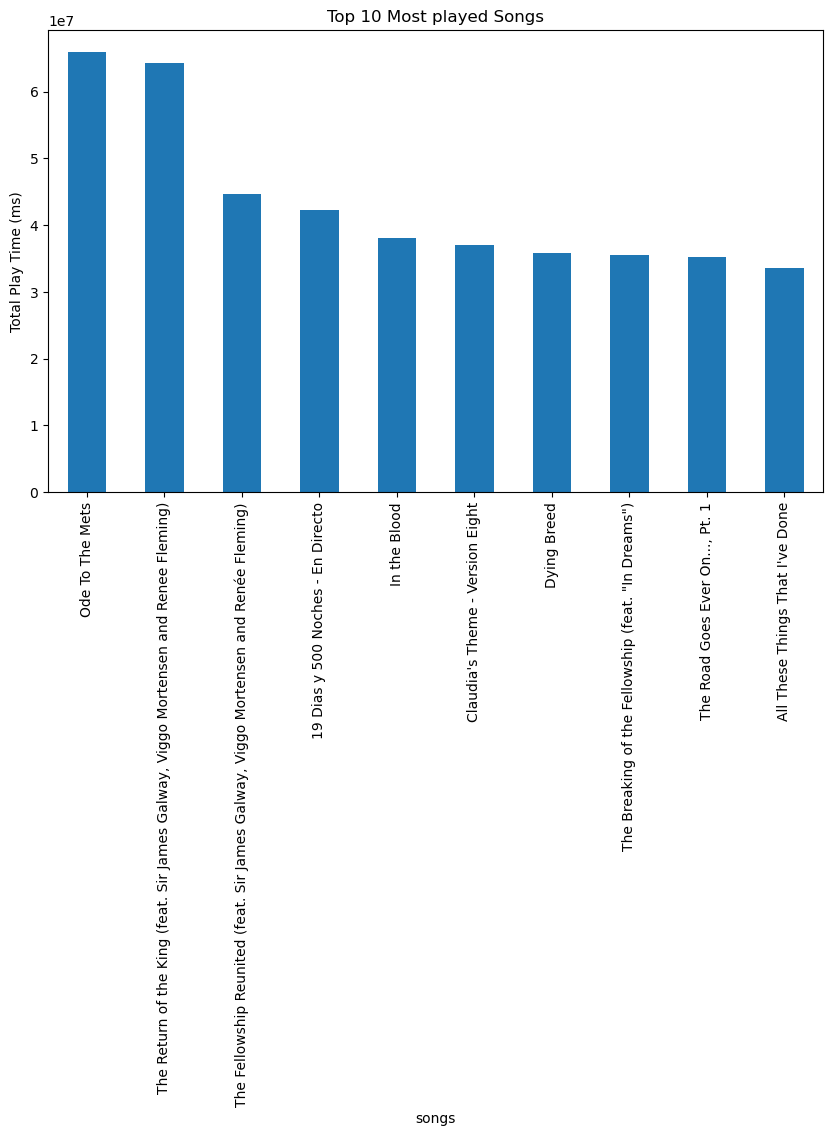

In [41]:
top_songs.plot(kind='bar', figsize=(10, 6), title='Top 10 Most played Songs')
p1t.xlabel('songs')
p1t.ylabel('Total Play Time (ms)')
p1t.show()

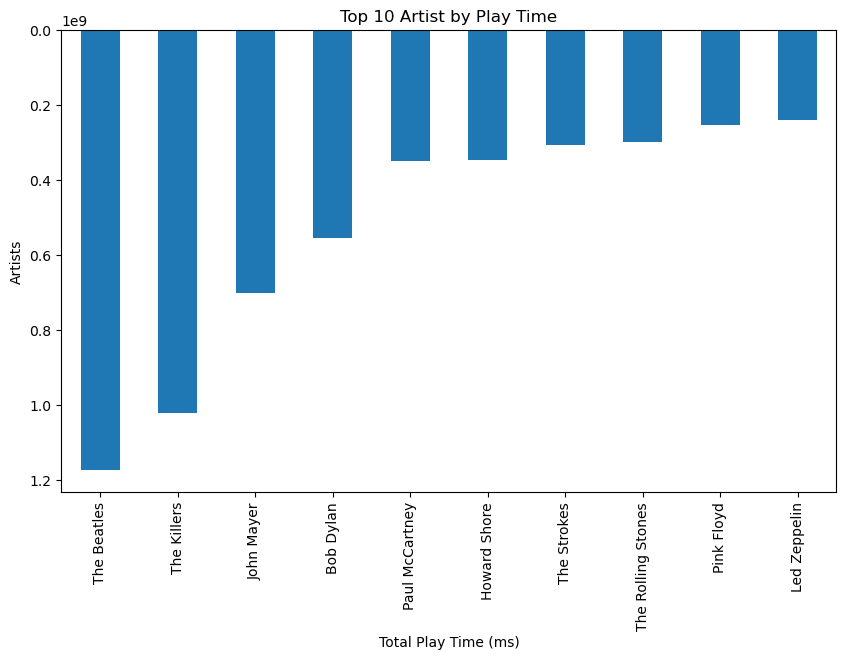

In [43]:
top_artists.plot(kind='bar', figsize=(10, 6), title='Top 10 Artist by Play Time')
p1t.xlabel('Total Play Time (ms)')
p1t.ylabel('Artists')
p1t.gca().invert_yaxis() # Flip the list so the top artist is on top
p1t.show()

In [45]:
p1t.figure(figsize=(12, 6)
daily_listening.plot(title='Daily Listening Time (minutes)')
p1t.xlabel('Date')
p1t.ylabel('Minutes Played')
p1t.show()

SyntaxError: '(' was never closed (4056961980.py, line 1)

In [47]:
p1t.figure(figsixe=(12, 6))
daily_listening.plot(title='Daily Listening Time (Minutes)')
p1t.xlabel('Date')
p1t.ylabel('Minutes Played')
p1t.show()

AttributeError: Figure.set() got an unexpected keyword argument 'figsixe'

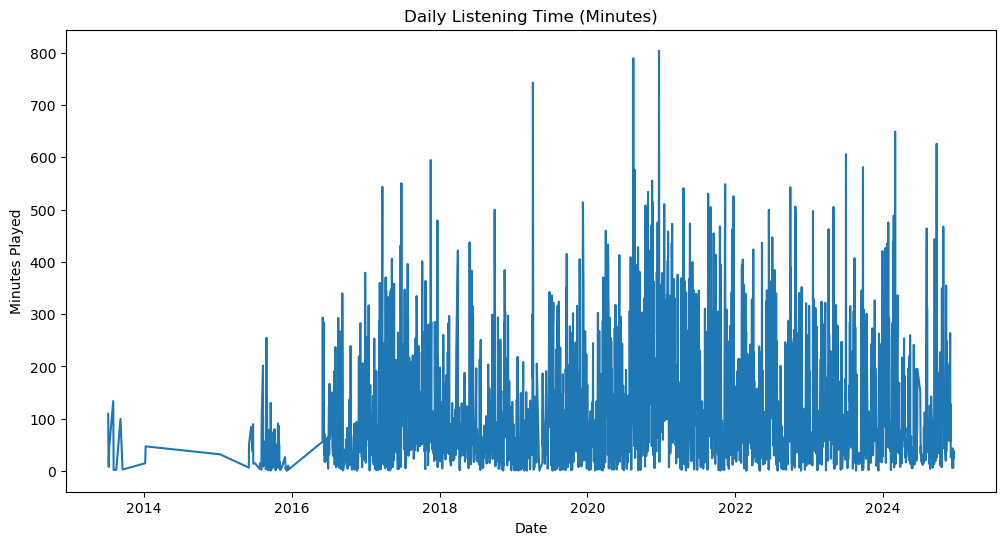

In [49]:
p1t.figure(figsize=(12, 6))
daily_listening.plot(title='Daily Listening Time (Minutes)')
p1t.xlabel('Date')
p1t.ylabel('Minutes Played')
p1t.show()

In [51]:
skipped_daily = df['skipped'] == True].groupby('date').size()
p1t.figure(figsize=(12, 6))
p1t.xlabel('Date')
p1t.ylabel('Number of Skips')
p1t.show()

SyntaxError: unmatched ']' (262186897.py, line 1)

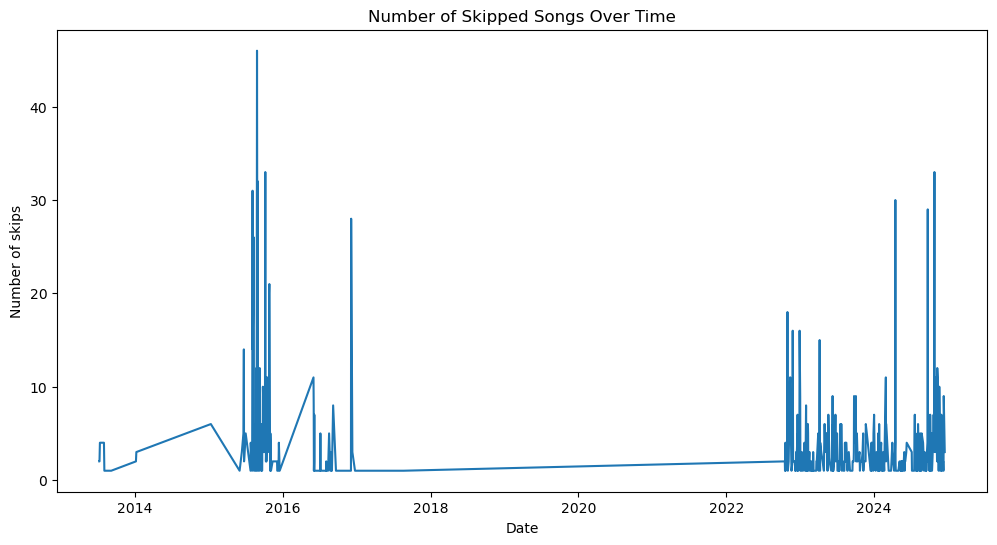

In [53]:
skipped_daily = df[df['skipped'] == True].groupby('date').size()

p1t.figure(figsize=(12, 6))
skipped_daily.plot(title='Number of Skipped Songs Over Time')
p1t.xlabel('Date')
p1t.ylabel('Number of skips')
p1t.show()

In [55]:
df.to_csv('cleaned_spotify_history.csv', index=False)